In [1]:
import tensorflow as tf

print(tf.__version__)

2.5.0


In [2]:
#!pip install tensorflow==2.5.0

In [3]:
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_buildings_dir = os.path.join('C:/Users/sreel/Downloads/Data Science Data/Kaggle/IntelDataset/IntelDataset/seg_train/seg_train/buildings')

# Directory with our training human pictures
train_forest_dir = os.path.join('C:/Users/sreel/Downloads/Data Science Data/Kaggle/IntelDataset/IntelDataset/seg_train/seg_train/forest')

train_glacier_dir = os.path.join('C:/Users/sreel/Downloads/Data Science Data/Kaggle/IntelDataset/IntelDataset/seg_train/seg_train/glacier')

train_mountain_dir = os.path.join('C:/Users/sreel/Downloads/Data Science Data/Kaggle/IntelDataset/IntelDataset/seg_train/seg_train/mountain')

train_sea_dir = os.path.join('C:/Users/sreel/Downloads/Data Science Data/Kaggle/IntelDataset/IntelDataset/seg_train/seg_train/sea')
train_street_dir = os.path.join('C:/Users/sreel/Downloads/Data Science Data/Kaggle/IntelDataset/IntelDataset/seg_train/seg_train/street')



test_buildings_dir = os.path.join('C:/Users/sreel/Downloads/Data Science Data/Kaggle/seg_test/seg_test/buildings')

# Directory with our training human pictures
test_forest_dir = os.path.join('C:/Users/sreel/Downloads/Data Science Data/Kaggle/seg_test/seg_test/forest')

test_glacier_dir = os.path.join('C:/Users/sreel/Downloads/Data Science Data/Kaggle/seg_test/seg_test/glacier')

test_mountain_dir = os.path.join('C:/Users/sreel/Downloads/Data Science Data/Kaggle/seg_test/seg_test/mountain')

test_sea_dir = os.path.join('C:/Users/sreel/Downloads/Data Science Data/Kaggle/seg_test/seg_test/sea')
test_street_dir = os.path.join('C:/Users/sreel/Downloads/Data Science Data/Kaggle/seg_test/seg_test/street')

In [5]:
train_buildings_names = os.listdir(train_buildings_dir)
train_forest_names = os.listdir(train_forest_dir)
train_glacier_names = os.listdir(train_glacier_dir)
train_mountain_names = os.listdir(train_mountain_dir)
train_sea_names = os.listdir(train_sea_dir)
train_street_names = os.listdir(train_street_dir)


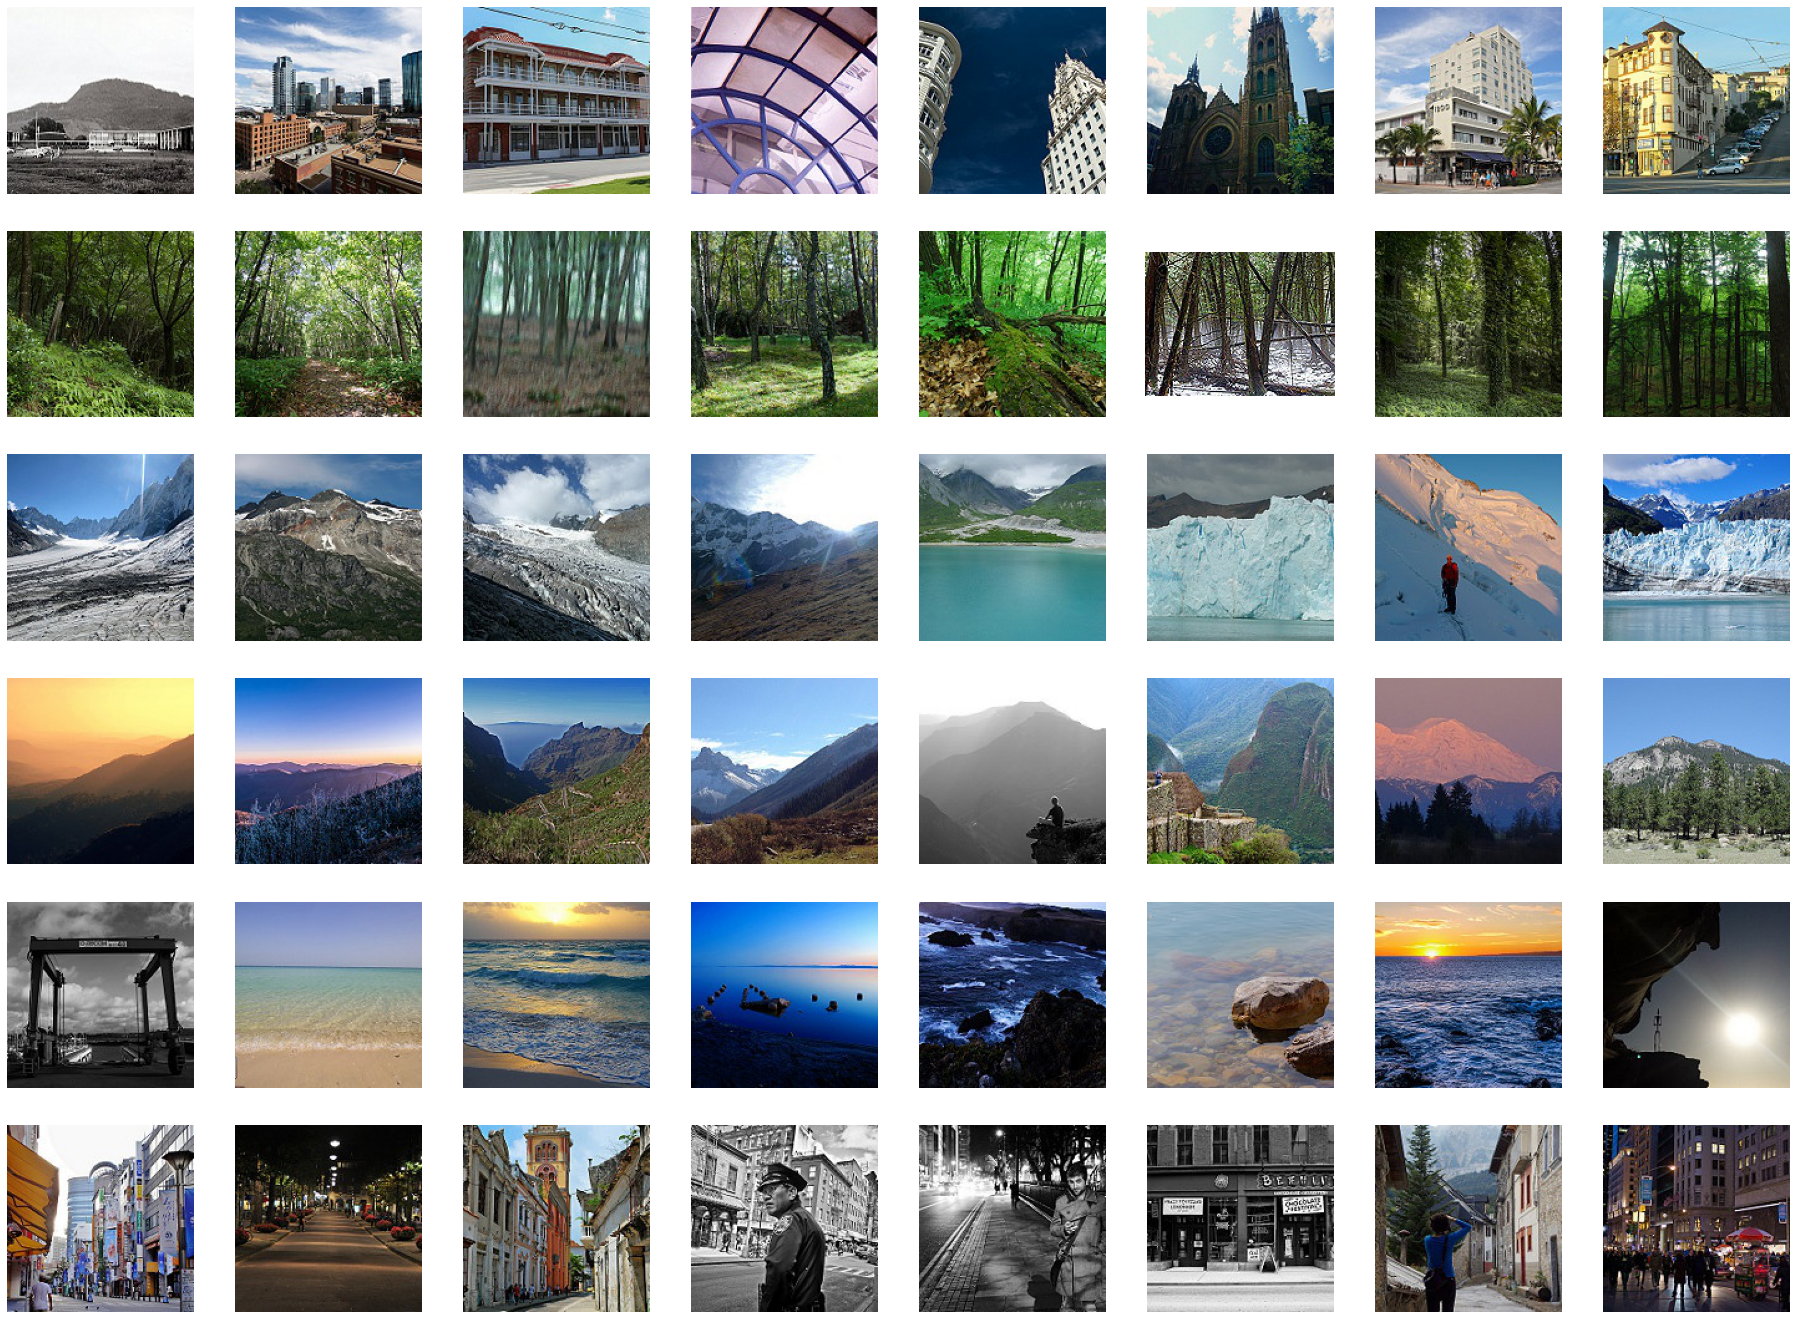

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 6
ncols = 8

# Index for iterating over images
pic_index = 0
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_building_pix = [os.path.join(train_buildings_dir, fname) 
                for fname in train_buildings_names[pic_index-8:pic_index]]
next_forest_pix = [os.path.join(train_forest_dir, fname) 
                for fname in train_forest_names[pic_index-8:pic_index]]
next_glacier_pix = [os.path.join(train_glacier_dir, fname) 
                for fname in train_glacier_names[pic_index-8:pic_index]]
next_mountain_pix = [os.path.join(train_mountain_dir, fname) 
                for fname in train_mountain_names[pic_index-8:pic_index]]
next_sea_pix = [os.path.join(train_sea_dir, fname) 
                for fname in train_sea_names[pic_index-8:pic_index]]
next_street_pix = [os.path.join(train_street_dir, fname) 
                for fname in train_street_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_building_pix+next_forest_pix+next_glacier_pix+next_mountain_pix+next_sea_pix+next_street_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [24]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.8):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True
        

callbacks = myCallback()

In [33]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
# #     # The third convolution
#     tf.keras.layers.Conv2D(32,(5,5), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [34]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9248)             

In [35]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [36]:
train_generator = train_datagen.flow_from_directory(
        'C:/Users/sreel/Downloads/Data Science Data/Kaggle/IntelDataset/IntelDataset/seg_train/seg_train',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 300x300
        batch_size=150,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='sparse')

validation_generator = validation_datagen.flow_from_directory(
        'C:/Users/sreel/Downloads/Data Science Data/Kaggle/seg_test/seg_test',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='sparse')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(
      train_generator,
      steps_per_epoch=20,  
      epochs=50,
    validation_data = validation_generator,
      validation_steps=20,
      verbose=1, callbacks=[callbacks])

Epoch 1/50
20/20 [==============================] - 49s 2s/step - loss: 1.5539 - accuracy: 0.3760 - val_loss: 1.2106 - val_accuracy: 0.5328
Epoch 2/50
20/20 [==============================] - 49s 2s/step - loss: 1.1151 - accuracy: 0.5557 - val_loss: 1.0174 - val_accuracy: 0.5938
Epoch 3/50
20/20 [==============================] - 48s 2s/step - loss: 0.9981 - accuracy: 0.6203 - val_loss: 0.9145 - val_accuracy: 0.6719
Epoch 4/50
20/20 [==============================] - 48s 2s/step - loss: 0.9558 - accuracy: 0.6440 - val_loss: 0.9082 - val_accuracy: 0.6375
Epoch 5/50
20/20 [==============================] - 47s 2s/step - loss: 0.8372 - accuracy: 0.6915 - val_loss: 0.8289 - val_accuracy: 0.6906
Epoch 6/50
20/20 [==============================] - 48s 2s/step - loss: 0.7777 - accuracy: 0.7140 - val_loss: 0.7939 - val_accuracy: 0.6766
Epoch 7/50
20/20 [==============================] - 47s 2s/step - loss: 0.7578 - accuracy: 0.7222 - val_loss: 0.7245 - val_accuracy: 0.7203
Epoch 8/50
20/20 [==

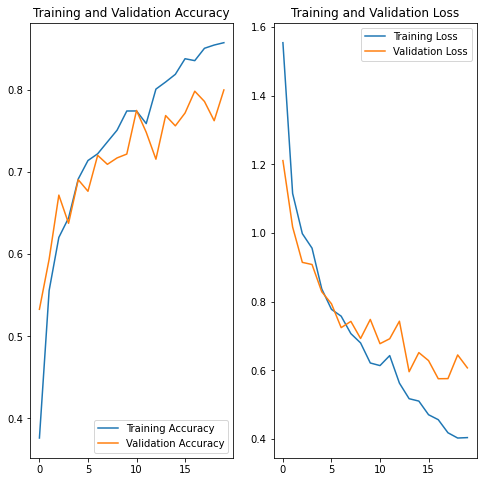

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(history.epoch )
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
from keras.preprocessing.image import load_img
import numpy as np
image = load_img('C:/Users/sreel/Downloads/Data Science Data/Kaggle/seg_pred/seg_pred/1680.jpg', target_size=(150, 150))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,150,150,3)
label = model.predict_classes(img)
print(label)

[3]
